In [1]:
from pathlib import Path
from typing import Tuple

import numpy as np
import numpy.typing as npt
import skimage.transform
import skimage.util
from tifffile import tifffile
from pybasic import compute_illum_profiles

working_size = 128
images_path = Path(r'images/WSI_Brain/Uncorrected_tiles')

In [2]:
def resize(a: npt.NDArray, shape: Tuple[int, ...]) -> npt.NDArray:
    return skimage.transform.resize(a, shape, order=1, mode='symmetric')


# read in images
images = [tifffile.imread(p) for p in images_path.iterdir() if p.name.endswith('.tif')]
images = [resize(im, (working_size, working_size)) for im in images]
images = np.stack(images)
images = skimage.util.img_as_float(images)

# compute
flatfield, darkfield = compute_illum_profiles(images, compute_darkfield=True)

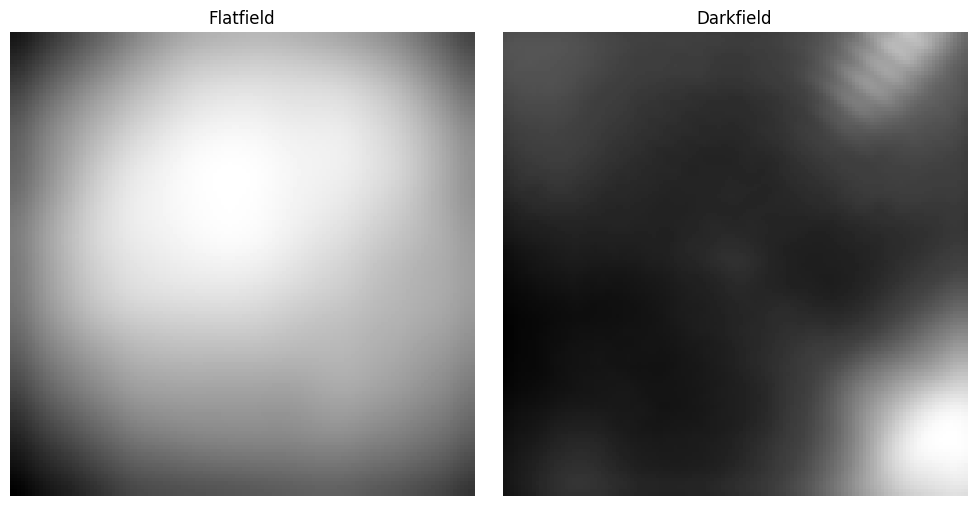

In [3]:
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig: Figure
axes: npt.NDArray[Axes]

axes[0].imshow(flatfield, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Flatfield')

axes[1].imshow(darkfield, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Darkfield')

fig.tight_layout()

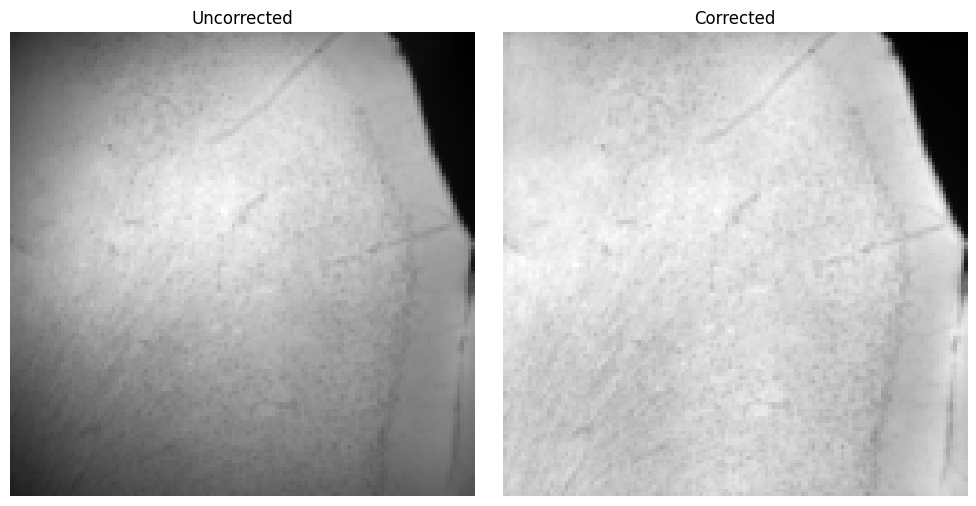

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig: Figure
axes: npt.NDArray[Axes]

image = images[4]
corrected = (image - darkfield) / flatfield

axes[0].imshow(image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Uncorrected')

axes[1].imshow(corrected, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Corrected')

fig.tight_layout()